# **Practical assignment for Topic 5**



In your assigmnet, you will use the following **data** (*do not modify the code*):

In [18]:
### DO NOT MODIFY THIS CODE. JUST RUN IT.

from sklearn.datasets import make_blobs

# creating the dataset
X, y = make_blobs(n_samples=70, centers=[(0, 0), (3, 4), (2, -5), (6, 3), (8, -1), (6, -6)], n_features=2, cluster_std=1.5, random_state=42)
y[y == 2] = 1
y[y == 3] = 0
y[y == 4] = 1
y[y == 5] = 0

# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Task 1

##### Step 1 : Plot the dataset in a 2D plot

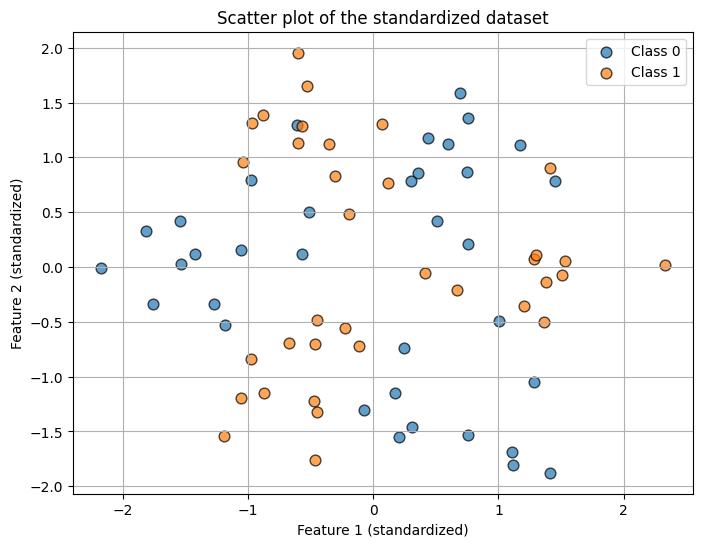

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# We already have X and y from the previous cell. Here we plot them on a 2D scatter chart.
# Matplotlib draws the graph, and NumPy makes it easy to work with the labels.
unique_labels = np.unique(y)  # This finds the different class labels present in y.

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes to draw on.
for label in unique_labels:
    class_points = X[y == label]  # Select only the points that belong to the current class.
    ax.scatter(
        class_points[:, 0],
        class_points[:, 1],
        label=f'Class {label}',
        s=60,
        alpha=0.7,
        edgecolor='k'
    )

ax.set_xlabel('Feature 1 (standardized)')
ax.set_ylabel('Feature 2 (standardized)')
ax.set_title('Scatter plot of the standardized dataset')
ax.legend()
ax.grid(True)
plt.show()


##### Step 2 : Use 10-fold cross-validation to compute macro-averaged F1-score and Accuracy measure evaluating 32 models that you get by creating polynomials from degree 1 to 4 and regularizing each of them by the following C values: `[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]` (don't worry if you get a couple of warning messages about convergence). Print all 32 F1-scores and Accuracies on screen. Store all 32 F1-scores in a 2D array.

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# We test every combination of polynomial degree and regularization strength.
degrees = [1, 2, 3, 4]
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# This array will later help us draw the F1 vs. C curve (rows = degrees, columns = C values).
f1_scores_grid = np.zeros((len(degrees), len(C_values)))

print('10-fold cross-validation (macro F1 and Accuracy) for each model:')
for row_index, degree in enumerate(degrees):
    print()
    print(f'Degree {degree}:')
    for col_index, C in enumerate(C_values):
        # Build a simple pipeline: polynomial expansion -> feature scaling -> logistic regression.
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression(C=C, max_iter=5000, solver='lbfgs'))
        ])

        # cross_validate lets us compute both metrics in a single pass.
        scores = cross_validate(
            model, X, y, cv=10,
            scoring={'macro_f1': 'f1_macro', 'accuracy': 'accuracy'}
        )

        mean_f1 = scores['test_macro_f1'].mean()
        mean_accuracy = scores['test_accuracy'].mean()

        f1_scores_grid[row_index, col_index] = mean_f1

        print(f'  C={C:<7} | F1={mean_f1:.4f} | Accuracy={mean_accuracy:.4f}')



10-fold cross-validation (macro F1 and Accuracy) for each model:

Degree 1:
  C=0.0001  | F1=0.3000 | Accuracy=0.4286
  C=0.001   | F1=0.3000 | Accuracy=0.4286
  C=0.01    | F1=0.2844 | Accuracy=0.4000
  C=0.1     | F1=0.2835 | Accuracy=0.3000
  C=1       | F1=0.3044 | Accuracy=0.3429
  C=10      | F1=0.3044 | Accuracy=0.3429
  C=100     | F1=0.3044 | Accuracy=0.3429
  C=1000    | F1=0.3044 | Accuracy=0.3429

Degree 2:
  C=0.0001  | F1=0.3000 | Accuracy=0.4286
  C=0.001   | F1=0.3000 | Accuracy=0.4286
  C=0.01    | F1=0.4113 | Accuracy=0.4571
  C=0.1     | F1=0.3995 | Accuracy=0.4143
  C=1       | F1=0.3840 | Accuracy=0.4000
  C=10      | F1=0.4001 | Accuracy=0.4143
  C=100     | F1=0.4001 | Accuracy=0.4143
  C=1000    | F1=0.4001 | Accuracy=0.4143

Degree 3:
  C=0.0001  | F1=0.3000 | Accuracy=0.4286
  C=0.001   | F1=0.3700 | Accuracy=0.4714
  C=0.01    | F1=0.6928 | Accuracy=0.7143
  C=0.1     | F1=0.7879 | Accuracy=0.8143
  C=1       | F1=0.8094 | Accuracy=0.8286
  C=10      | F1=0.8

##### Step 3 : Use the array from Step 2 to plot a single diagram showing dependence of F1 on C for all four polynomial degrees. In the diagram plot four curves (one for each polynomial degree). The horizontal axis (C) should be log-scaled.

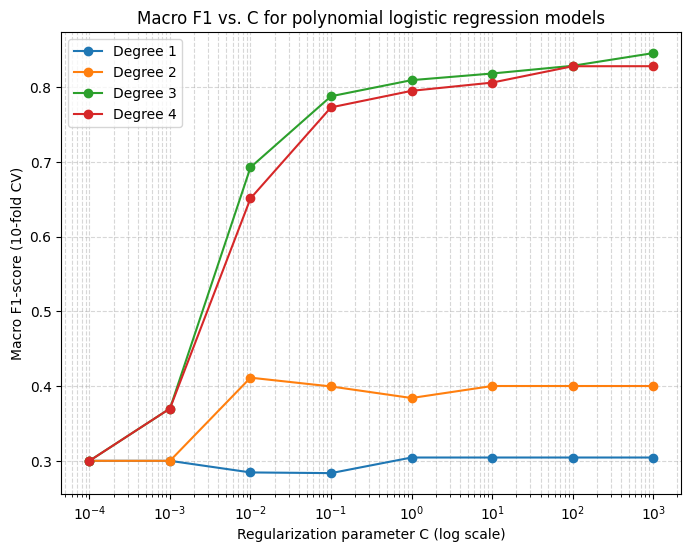

In [21]:
# C_values and f1_scores_grid were created in Step 2.
# Here we plot one curve per polynomial degree to see how the F1 score changes as C grows.
fig, ax = plt.subplots(figsize=(8, 6))

for degree_index, degree in enumerate(degrees):
    # Plot C on the x-axis and the corresponding macro F1 score on the y-axis.
    ax.plot(
        C_values,
        f1_scores_grid[degree_index],
        marker='o',
        label=f'Degree {degree}'
    )

ax.set_xscale('log')  # Requested log-scale for the C axis so we can see the trend clearly.
ax.set_xlabel('Regularization parameter C (log scale)')
ax.set_ylabel('Macro F1-score (10-fold CV)')
ax.set_title('Macro F1 vs. C for polynomial logistic regression models')
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()


##### Step 4 : Plot four diagrams showing the data points and decision thresholds for each polynomial degree when the best C value is used.


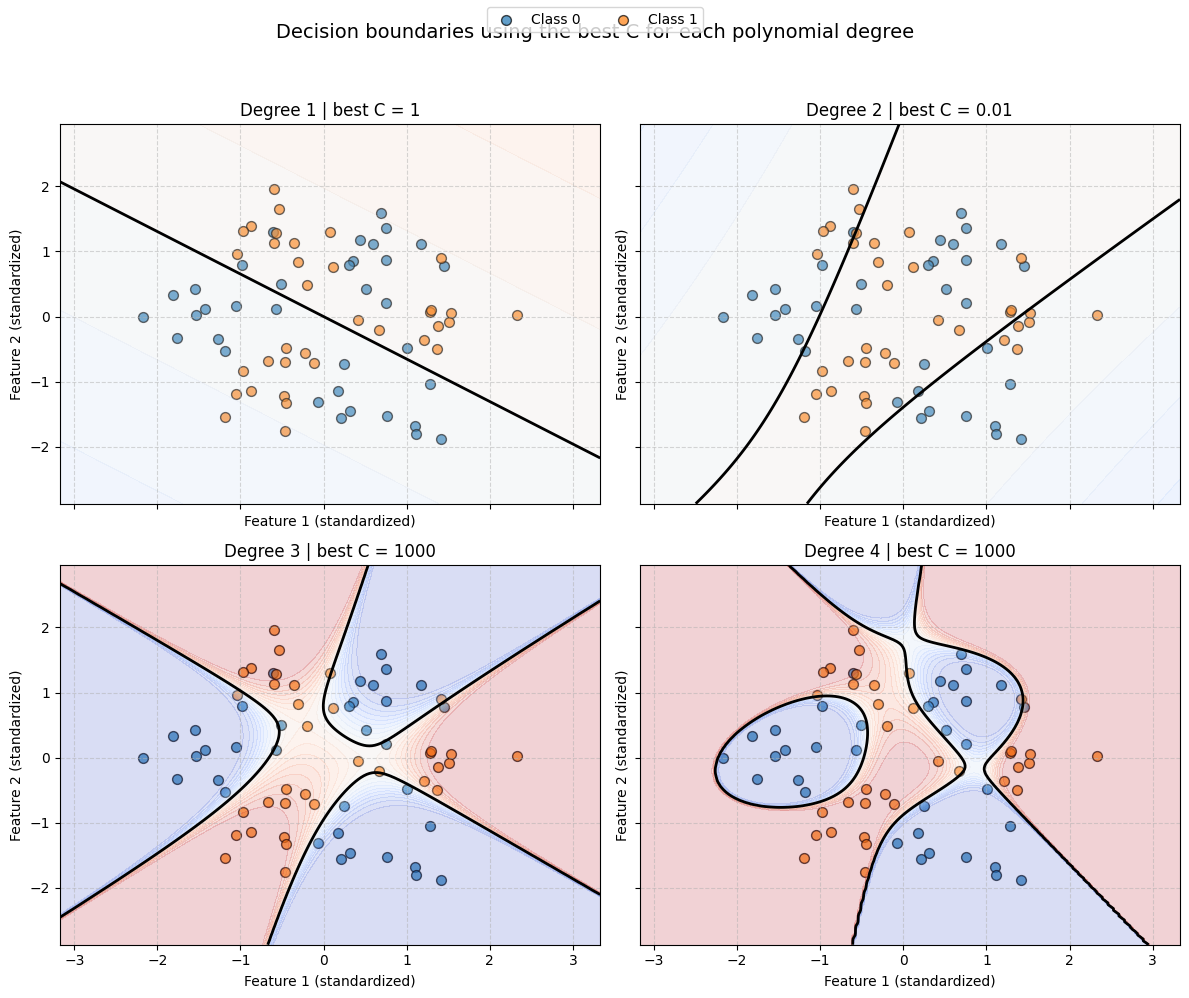

In [22]:
# The best C for each degree is where the F1 score is the highest in f1_scores_grid.
best_c_indices = np.argmax(f1_scores_grid, axis=1)
best_C_values = [C_values[index] for index in best_c_indices]

# Prepare a grid of points that will let us draw decision boundaries in 2D.
x0_min, x0_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
x1_min, x1_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(
    np.linspace(x0_min, x0_max, 200),
    np.linspace(x1_min, x1_max, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

unique_labels = np.unique(y)  # Label list for colouring the scatter plot.

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.ravel()

for degree_index, degree in enumerate(degrees):
    ax = axes[degree_index]
    best_C = best_C_values[degree_index]

    # Build and train the model using the best C value for this degree.
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(C=best_C, max_iter=5000, solver='lbfgs'))
    ])
    model.fit(X, y)

    # Predict class probabilities on the grid so we can draw where the model predicts class 1.
    Z = model.predict_proba(grid_points)[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the original data points. Only the first subplot carries labels for the legend.
    for label in unique_labels:
        label_points = X[y == label]
        legend_label = f'Class {label}' if degree_index == 0 else None
        ax.scatter(
            label_points[:, 0],
            label_points[:, 1],
            label=legend_label,
            edgecolor='k',
            s=50,
            alpha=0.7
        )

    # The contour where probability = 0.5 is the model's decision boundary.
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 21), alpha=0.2, cmap='coolwarm')

    ax.set_title(f'Degree {degree} | best C = {best_C}')
    ax.set_xlabel('Feature 1 (standardized)')
    ax.set_ylabel('Feature 2 (standardized)')
    ax.grid(True, linestyle='--', alpha=0.5)

# Create a single legend at the top of the figure.
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=max(1, len(unique_labels)))
fig.suptitle('Decision boundaries using the best C for each polynomial degree', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Task 2 : Write conclusions about the plotted diagrams, especially the F1 vs. C diagram, and printed F1 and Accuracy values. Which degree together with which C value is the best? Remember that analyzing your results is very important.

With 1-degree polynomials, it seems difficult to get good results : F1-score stays around 0.3 and the accuracy is between 0.34 and 0.43, which are not good enough to make the model usable.
With 2-degree, it is quite the same thing, except that both scores seem a bit higher : F1-score is between 0.3 and 0.4 and accuracy is between 0.4 et 0.45.
We start getting interesting results with 3 and 4-degree polynomials. 3-degree gets the best results with C=1000. 4-degree gets its best results with C=100, but the best results are with 3-degree.

From the F1 vs C diagram, we can draw several conclusions :  
1. on complex datasets like this one, lower degree polynomials (1-2) are rather useless  
2. we get interesting values from C=0.01, and better ones from C=0.1  
3. with this particular dataset, 3-degree polynomials seem to work better. As we learned in class, the highest degree isn't always relevant because it can sometimes be overfitting.

For the 4 diagrams showing the decision threshold, we can see why 1-degree and 2-degree polynomials don't work ; the dataset structure is too complex for such simple polynomials to well encapsulate the data.
The 3-degree diagram is interesting and shows it might even be worth it to try and push C even further for it, as sometimes with opening a bit more the angles or moving slightly the curve some points could enter the right zone, and the curves are still clear and well defined.
The 4-degree diagram has a very complex shape, with sometimes detours and twists around isolated points, meaning it's probably slightly overfitting.

The best choice here seems to be a 3-degree polynomial with a very high C, here 1000. 4-degree also gives an interesting vision, as it understands well how the points are clustered (we can see it with the round shape created in the left of the graphic), but it seems to slightly overfit.
Overall, a degree 3 polynomial with a large C keeps the boundary flexible without turning chaotic, so it feels like the right bias-variance compromise.  


NB: F1 staying above accuracy hints the classes are fairly balanced. Let's also keep in mind that we only have 70 samples and use 10-fold CV, so a different split could move these scores.
